# BMT on a Circle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from mergeTrees import *

### Creating a density on the circle

The following creates a particular density on the circle. We will use this to illustrate the concept of the Barycentric Merge Tree (BMT).

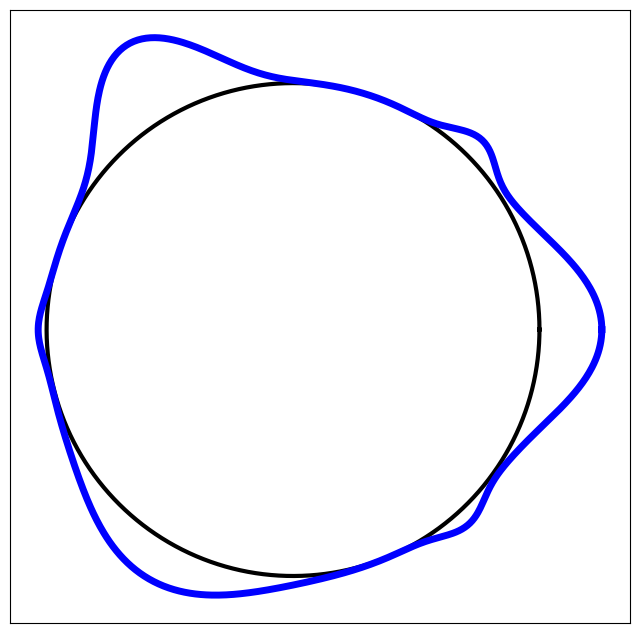

In [2]:
def smooth_circular_distribution(theta):
    """
    Define a smooth 4-modal probability density function over the circle.
    Args:
        theta: Angle in radians (array-like).
    Returns:
        PDF values corresponding to each theta.
    """
    # Unequal modes (centers in radians, heights, widths)
    centers = [0*np.pi, 1/4*np.pi, 2/3*np.pi, np.pi, 4/3*np.pi, 5.2/3*np.pi]
    heights = [3,1,4,0.4,2,0.75]
    widths = [0.25,0.1,0.2,0.1,0.3,0.1]
    
    pdf = np.zeros_like(theta)
    for c, h, w in zip(centers, heights, widths):
        diff = (theta - c + np.pi) % (2*np.pi) - np.pi
        pdf += h * np.exp(-0.5 * (diff**2) / (w**2))
    
    return pdf

# Generate angles
angles = np.linspace(0, 2*np.pi, 1000)

# Compute and normalize PDF
pdf_values = smooth_circular_distribution(angles)
pdf_values /= np.trapz(pdf_values, angles)

# Convert to Cartesian for plotting
x_circle = np.cos(angles)
y_circle = np.sin(angles)
x_pdf = (1 + pdf_values/2)*np.cos(angles)
y_pdf = (1 + pdf_values/2)*np.sin(angles)

# Plot
plt.figure(figsize=(8,8))
plt.plot(x_circle, y_circle, label="Circle outline", color = 'black', linewidth = 3)
plt.plot(x_pdf, y_pdf, label="4-modal PDF", color = 'blue', linewidth = 5)
plt.gca().set_aspect("equal", "box")
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.show()


### Deviation Function

We calculate the associated deviation function (with $p=2$) for the distribution above. The plot shows the distribution and the deviation function after "unwrapping" the circle.

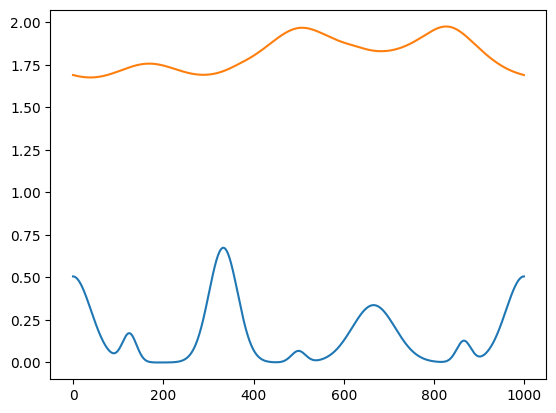

In [3]:
p = 2

deviation_values = np.array([np.sum([min(np.abs(angles[j]-angles[i]),
                                         2*np.pi-(np.abs(angles[j]-angles[i])))**p*pdf_values[j]*(2*np.pi/1000) 
                                     for j in range(len(angles))])**(1/p) 
                             for i in range(len(angles))])

plt.plot(pdf_values)
plt.plot(deviation_values)
plt.show()

### BMT

The following generates a picture of the associated BMT.

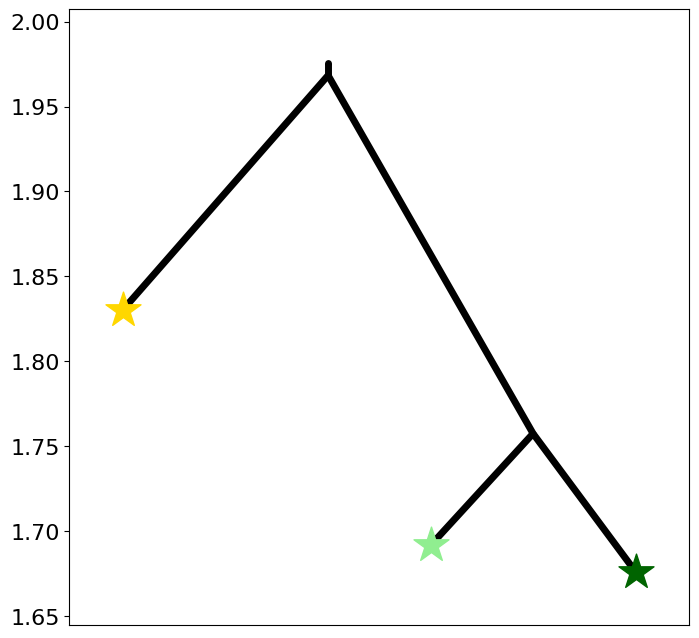

In [5]:
G = nx.Graph()
G.add_nodes_from(list(range(len(angles))))
G.add_edges_from([(i,i+1) for i in range(len(angles)-1)])
G.add_edge(len(angles)-1,0)

f = {i:deviation_values[i] for i in range(len(angles))}

T = simplify_merge_tree(get_merge_tree(G,f))

height = {node:T.nodes[node]['height'] for node in T.nodes()}
pos = mergeTree_pos(T,height)

fig, ax = plt.subplots(figsize=(8, 8))

nx.draw_networkx(T, pos=pos, with_labels=False,node_size = 15,node_color='black',width = 5)

leaves = [node for node in T if nx.degree(T)[node] == 1]
leaves.pop();

node = leaves[0]
x_min = np.array([pos[node][0]])
y_min = np.array([pos[node][1]])
plt.scatter(x_min, y_min, color="darkgreen", s=700, marker="*", label="Fréchet Means", alpha=1,zorder=10)

node = leaves[1]
x_min = np.array([pos[node][0]])
y_min = np.array([pos[node][1]])
plt.scatter(x_min, y_min, color="lightgreen", s=700, marker="*", label="Fréchet Means", alpha=1,zorder=10)

node = leaves[2]
x_min = np.array([pos[node][0]])
y_min = np.array([pos[node][1]])
plt.scatter(x_min, y_min, color="gold", s=700, marker="*", label="Fréchet Means", alpha=1,zorder=10)

ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False, labelsize = 16)
# ax.set_ylim(1.5, 2.2)

plt.savefig('merge_tree_complicated_distribution.png', format='png', dpi=300)

Finally, we plot the distribution with the local minima of the Fréchet function indicated. Colors corrspond to the leaves on the BMT.

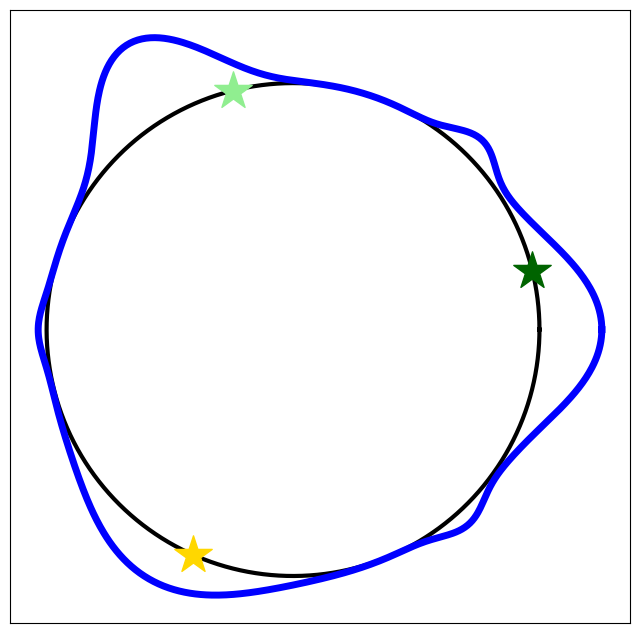

In [53]:
# Convert to Cartesian for plotting
x_circle = np.cos(angles)
y_circle = np.sin(angles)
x_pdf = (1 + pdf_values/2)*np.cos(angles)
y_pdf = (1 + pdf_values/2)*np.sin(angles)

# Plot
plt.figure(figsize=(8,8))
plt.plot(x_circle, y_circle, label="Circle outline", color = 'black', linewidth = 3)
plt.plot(x_pdf, y_pdf, label="4-modal PDF", color = 'blue', linewidth = 5)
plt.gca().set_aspect("equal", "box")
plt.xticks([])
plt.yticks([])

# Plot points corresponding to leaves
node = leaves[0]
other_node_circle_value = get_key(f,T.nodes[node]['height'])[0]
plt.scatter(x_circle[other_node_circle_value], y_circle[other_node_circle_value], color="darkgreen", s=800, marker="*", label="Fréchet Means", alpha=1,zorder=10)

node = leaves[1]
other_node_circle_value = get_key(f,T.nodes[node]['height'])[0]
plt.scatter(x_circle[other_node_circle_value], y_circle[other_node_circle_value], color="lightgreen", s=800, marker="*", label="Fréchet Means", alpha=1,zorder=10)

node = leaves[2]
other_node_circle_value = get_key(f,T.nodes[node]['height'])[0]
plt.scatter(x_circle[other_node_circle_value], y_circle[other_node_circle_value], color="gold", s=800, marker="*", label="Fréchet Means", alpha=1,zorder=10)

plt.savefig('complicated_circle_distribution.png', format='png', dpi=300)

plt.show()